# 套件載入

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#函數優化套件
import scipy.optimize as sco

# 股票價格

In [2]:
import pandas_datareader as pdr
import datetime

In [3]:
start = datetime.datetime(2019,1,19)
end = datetime.datetime(2019,12,19)
df_3533 = pdr.DataReader('3533.TW', 'yahoo', start=start, end=end)
df_8499 = pdr.DataReader('2317.TW', 'yahoo', start=start, end=end)

In [4]:
df_yahoo = pd.concat([df_3533['Close'],df_8499['Close']], axis = 1)

In [5]:
df_yahoo

,Close,Close
Date,,
2019-01-21,213.0,71.199997
2019-01-22,206.0,70.699997
2019-01-23,208.0,69.699997
2019-01-24,207.0,70.000000
2019-01-25,210.0,70.699997
...,...,...
2019-12-13,322.5,91.000000
2019-12-16,319.5,91.599998
2019-12-17,321.0,91.599998


In [6]:
df_yahoo.columns = ['3533','8499']

In [7]:
rdict={'3533':[0.1426],
       '2317':[0.0394]}
returns = pd.DataFrame(rdict)

In [8]:
returns

,3533,2317
0,0.1426,0.0394


In [9]:
returns.fillna(value=0, inplace=True)

In [10]:
# 建立報酬率及標準差函數

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) 
    return std, returns

In [11]:
#自訂投資組合數
num_portfolios = 25000

# 建立隨機投資組合
def random_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(code))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return) / portfolio_std_dev
    return results, weights_record

In [12]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:7639: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [13]:
mean_returns

3533    0.1426
2317    0.0394
dtype: float64

In [14]:
code=[3533,8499]

# SAMPLE：隨機投資組合

results = np.zeros((3,num_portfolios))
weights_record = []
for i in range(num_portfolios):
    weights = np.random.random(len(code))
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_std_dev, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_std_dev
    results[1,i] = portfolio_return
    results[2,i] = (portfolio_return) / portfolio_std_dev

print('-' * 100)
print('平均報酬：\n',mean_returns )
print('-' * 100)
print('投組權重：', weights_record[0])
print('-' * 100)
print('報酬率：', results[1][0])
print('-' * 100)
print('標準差：', results[0][0])
print('-' * 100)

----------------------------------------------------------------------------------------------------
平均報酬：
 3533    0.1426
2317    0.0394
dtype: float64
----------------------------------------------------------------------------------------------------
投組權重： [0.6698659 0.3301341]
----------------------------------------------------------------------------------------------------
報酬率： 0.10853016045423507
----------------------------------------------------------------------------------------------------
標準差： nan
----------------------------------------------------------------------------------------------------


No handles with labels found to put in legend.


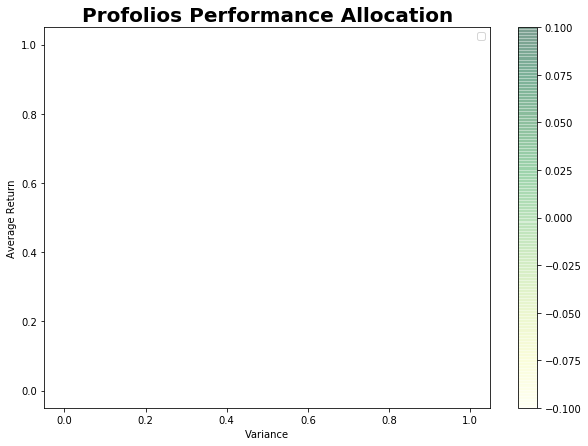

In [15]:
# 投資組合散佈圖

def profolios_allocation(mean_returns, cov_matrix, num_portfolios):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix)
      
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGn', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.title('Profolios Performance Allocation', fontsize=20,fontweight='bold',)
    plt.xlabel('Variance')
    plt.ylabel('Average Return')
    plt.legend(labelspacing=0.8)
    plt.show()
    
profolios_allocation(mean_returns, cov_matrix, num_portfolios)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [5]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')

In [6]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.